<a href="https://colab.research.google.com/github/JJJJeon/ESAA/blob/main/Pytorch_5_Intro_to_Neural_Networks_Continuous.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python Session 5: Introduction to Neural Networks

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader


In [2]:
from sklearn.datasets import load_boston
import pandas as pd

In [3]:
bos = load_boston()
bos.keys()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [4]:
df = pd.DataFrame(bos.data)
df.columns = bos.feature_names
df['Price'] = bos.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
data = df.iloc[:, :-1]
data.shape
data = (data - data.mean(axis=0))/np.sqrt(data.var(axis=0))
#data["price"]=df.Price

In [7]:
X = torch.tensor(data.to_numpy(), dtype=torch.float32) #to_numpy처럼 데이터 변환 중요함
print(X.dtype)
Y = torch.tensor(df.Price.to_numpy(), dtype=torch.float32).reshape([-1, 1])
print(Y.dtype)
print(X.shape)
print(Y.shape)

torch.float32
torch.float32
torch.Size([506, 13])
torch.Size([506, 1])


In [9]:
x_train = torch.tensor(X[:400])
y_train = torch.tensor(Y[:400])
x_test = torch.tensor(X[400:])
y_test = torch.tensor(Y[400:])
print(x_test.shape, y_train.shape)

torch.Size([106, 13]) torch.Size([400, 1])


<ipython-input-9-ebae6b43261f>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_train = torch.tensor(X[:400])
<ipython-input-9-ebae6b43261f>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(Y[:400])
<ipython-input-9-ebae6b43261f>:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_test = torch.tensor(X[400:])
<ipython-input-9-ebae6b43261f>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.t

In [10]:
train_data = TensorDataset( y_train, x_train,) # 왜 바꾼건지 모르겠음 걍 안바꿔도 되..는듯
trainloader= DataLoader(dataset = train_data, batch_size=32, shuffle=True)

test_data = TensorDataset(y_test, x_test)
testloader= DataLoader(dataset = test_data, batch_size=len(x_test), shuffle=True)


In [11]:
print(x_train.shape)

torch.Size([400, 13])


Yhat [n,n] - Y[n,n]

## 5.0 Linear regression (Base model)

In [12]:
LinMod = torch.nn.Linear(13, 1) #X@W+b, W[13,1], b[1,]
loss_ftn = torch.nn.MSELoss()
optimizer = torch.optim.SGD(LinMod.parameters(), lr=0.01)
history = []

epochs=20
history=[]

for epoch in range(epochs):
  running_loss =0
  for yy, xx in trainloader: #왜 굳이 순서를 바꿔서 이거까지 바꾸게 하는건지 모르겠음
    yhat = LinMod(xx)
    loss = loss_ftn(yhat, yy) #loss function 정의
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    running_loss += loss.item()*len(xx)
  history.append(running_loss/len(x_train))


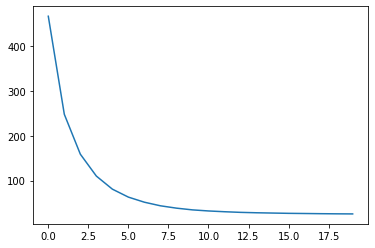

In [13]:
plt.plot(history)

In [14]:
y_pred = LinMod(x_test)
torch.mean((y_test-y_pred)**2) #mse 구하는 문제 낼 수 있음

tensor(41.2313, grad_fn=<MeanBackward0>)

In [15]:
y_pred = LinMod(x_train)
torch.mean((y_train-y_pred)**2)

tensor(25.2704, grad_fn=<MeanBackward0>)

In [17]:
y_pred = LinMod(x_test)
torch.mean(torch.abs(y_test-y_pred)) #mae

tensor(4.8171, grad_fn=<MeanBackward0>)

## 5.1 Create the neural networks using torch function.

In [18]:
DN1 = torch.nn.Linear(13, 4)
DN2 = torch.nn.ReLU()
DN3 = torch.nn.Linear(4, 4)
DN4 = torch.nn.ReLU()
DN5 = torch.nn.Linear(4, 1)
loss_ftn = torch.nn.MSELoss()
optimizer = torch.optim.SGD(list(DN1.parameters())+list(DN3.parameters())+list(DN5.parameters()), lr=0.001)
history = []

In [19]:
epochs=50
history=[]

for epoch in range(epochs):
  running_loss =0
  for yy, xx in trainloader:
    xx = DN1(xx)
    xx = DN2(xx)
    xx = DN3(xx)
    xx = DN4(xx)
    yhat = DN5(xx)
    loss = loss_ftn(yhat, yy)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    running_loss += loss*len(xx)
  history.append(running_loss.item()/len(x_train))

In [20]:
history[-1]

14.6670068359375

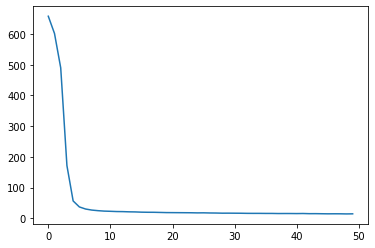

In [21]:
plt.plot(history)

In [22]:
xx = DN1(x_train)
xx = DN2(xx)
xx = DN3(xx)
xx = DN4(xx)
y_pred = DN5(xx)
torch.mean((y_train-y_pred)**2)

tensor(13.9896, grad_fn=<MeanBackward0>)

In [23]:
xx = DN1(x_test)
xx = DN2(xx)
xx = DN3(xx)
xx = DN4(xx)
y_pred = DN5(xx)
torch.mean((y_test-y_pred)**2)

tensor(20.9623, grad_fn=<MeanBackward0>)

## 5.1. Create the neural networks using `torch.nn.Sequential`.

A sequential container. Modules will be added to it in the order they are passed in the constructor. Alternatively, an OrderedDict of modules can be passed in. The forward() method of Sequential accepts any input and forwards it to the first module it contains. It then “chains” outputs to inputs sequentially for each subsequent module, finally returning the output of the last module.

In [24]:
DN = torch.nn.Sequential(
    torch.nn.Linear(13, 5), 
    torch.nn.ReLU(),
    torch.nn.Linear(5, 5), 
    torch.nn.ReLU(),
    torch.nn.Linear(5, 1), 
)

loss_ftn = torch.nn.MSELoss()
optimizer = torch.optim.SGD(DN.parameters(), lr=0.001)
history = []

In [25]:
epochs=50
history=[]

for epoch in range(epochs):
  running_loss =0
  for yy, xx in trainloader:
    optimizer.zero_grad()
    yhat = DN(xx)
    loss = loss_ftn(yhat, yy)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()*len(xx)
  history.append(running_loss/len(trainloader.dataset))

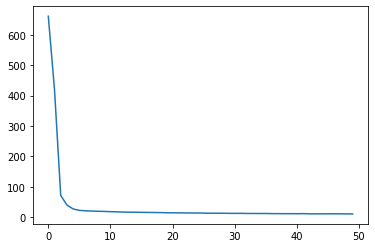

In [28]:
plt.plot(history)

In [29]:
y_pred = DN(x_test)
torch.mean((y_test-y_pred)**2)

tensor(21.0433, grad_fn=<MeanBackward0>)

In [30]:
y_pred = DN(x_train)
torch.mean((y_train-y_pred)**2)

tensor(10.5453, grad_fn=<MeanBackward0>)

In [31]:
list(DN.named_parameters())

[('0.weight', Parameter containing:
  tensor([[-0.2144,  0.0436,  0.3974, -0.0555, -0.3821,  0.1576,  0.2428, -0.7744,
            0.2825,  0.1554, -0.0338, -0.0824, -1.2144],
          [-0.2467, -0.0902, -0.3945, -0.1389,  0.1018,  0.7408, -0.3341,  0.2546,
           -0.4359, -0.7455, -0.3479,  0.2626,  0.4274],
          [-0.3002, -0.2989,  0.1608,  0.2851, -0.1404, -0.7076,  0.0145, -0.3163,
            0.0287,  0.1880,  0.1996, -0.1074, -0.1931],
          [ 0.0685, -0.0367,  0.1258,  0.2627, -0.1083,  0.5709, -0.2116, -0.2687,
            0.2175,  0.0519, -0.1126, -0.2261, -0.1848],
          [ 0.0864,  0.2427,  0.1556,  0.0285,  0.0355,  0.3062,  0.0605,  0.1612,
            0.2119,  0.3136,  0.1539,  0.1334, -0.8804]], requires_grad=True)),
 ('0.bias', Parameter containing:
  tensor([ 0.7801,  1.1423,  0.4408,  0.1107, -0.0784], requires_grad=True)),
 ('2.weight', Parameter containing:
  tensor([[ 0.1424, -0.1078, -0.0767, -0.1953, -0.0159],
          [-0.0693, -0.3805, -0.0849

In [32]:
for name, param in DN.named_parameters():
  print(name)

0.weight
0.bias
2.weight
2.bias
4.weight
4.bias


In [33]:
type(DN.named_parameters())

generator

In [ ]:
DN.state_dict().keys()

In [34]:
DN.state_dict()["0.weight"].T.shape #이거 왜 교수님은 tensor(0,) 나옴
torch.nn.functional.relu_(torch.tensor(3.0))

tensor(3.)

## Exercise: 

Without using `DN(x_test)`, calculate `y_hat_test`

Hint: Use the following command to retrieve the trained weights.

``DN.state_dict() ``

In [35]:
DN.state_dict().keys()
relu=torch.nn.ReLU()
relu(torch.tensor(-3.0))

tensor(0.)

In [36]:
W0=DN.state_dict()["0.weight"].T
b0=DN.state_dict()["0.bias"]
W2=DN.state_dict()["2.weight"].T
b2=DN.state_dict()["2.bias"]
W4=DN.state_dict()["4.weight"].T
b4=DN.state_dict()["4.bias"]
#시험문제 여기까지 주고 test mse 계산하시오 하면 밑에 코드 쓰면 된대

xx=relu(x_train @ W0+b0)
xx=relu(xx @ W2+b2)
yhat_train=xx @ W4+b4

torch.mean((yhat_train-y_train)**2)

tensor(10.5453)

## 5.2. Custom layer

In [40]:
nparam1=5
nparam2=5
class my_dn(torch.nn.Module):
    def __init__(self):
        """
        In the constructor we instantiate four parameters and assign them as
        member parameters.
        """
        super().__init__()
        self.weight1 = torch.nn.Parameter(torch.randn(([13, nparam1])))
        self.bias1 = torch.nn.Parameter(torch.randn(([nparam1,])))
        self.weight2 = torch.nn.Parameter(torch.randn(([nparam1, nparam2])))
        self.bias2 = torch.nn.Parameter(torch.randn(([nparam2,])))
        self.weight3 = torch.nn.Parameter(torch.randn(([nparam2, 1])))
        self.bias3 = torch.nn.Parameter(torch.randn(([1,])))

    def forward(self, x):
        """
        In the forward function we accept a Tensor of input data and we must return
        a Tensor of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Tensors.
        """
        x = x@self.weight1 + self.bias1
        x = self.relu(x) #relu? relu1?
        x = x@self.weight2 + self.bias2
        x = self.relu(x)
        x = x@self.weight3 + self.bias3
        return x

In [41]:
DN = my_dn()
loss_ftn = torch.nn.MSELoss()
optimizer = torch.optim.SGD(DN.parameters(), lr=0.001)
history = []

In [42]:
epochs=200
history=[]

for epoch in range(epochs):
  running_loss =0
  for yy, xx in trainloader:
    optimizer.zero_grad()
    yhat = DN(xx)
    loss = loss_ftn(yhat, yy)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()*len(xx)
  history.append(running_loss/len(trainloader.dataset))

AttributeError: ignored

In [ ]:
plt.plot(history)

In [ ]:
y_pred = DN(x_test)
torch.mean((y_test-y_pred)**2)

In [ ]:
y_pred = DN(x_train)
torch.mean((y_train-y_pred)**2)

### Exercise:

 Using predefined layer in the customed module, do the same thing.

 Hint: you can modify the following class function.

In [ ]:
class my_dn2(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = torch.nn.Linear(13, 5)
        self.relu = torch.nn.ReLU()
        self.linear2 = torch.nn.Linear(5, 4)
        self.linear3 = torch.nn.Linear(4, 1)
    def forward(self, x):
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        x = self.relu(x)
        x = self.linear3(x)
        return x

In [ ]:
DN=my_dn2()

In [ ]:
loss_ftn=torch.nn.MSELoss()
optimizer=torch.optim.SGD(DN.parameters(),lr=0.001)
history=[]

In [ ]:
epochs=50
history=[]

for epoch in range(epochs):
  #이런거 있는 코드 위에서 긁어오면 돼 plot_history까지

### Example 5.2.1.1: 

In the trained `DN2` layer, you want to calculate the test MSE. The first step would be to use the following 
```
y_pred = DN2(x_test)
```

Replace `y_pred = DN2(x_test)` with python code using such as`DN2.linear1` and `DN2.linear2`. Then, calculate the test MSE.

### Example 5.2.1.2: 

In `DN2` layer, replace one of linear layer `self.linear2 = torch.nn.Linear(64, 10)` with user defined weight and bias. Then, repeat the same procedure in Example 4.2.1.1 to calculate the test MSE.